In [1]:
! pip install kaggle
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
! unzip chest-xray-pneumonia.zip

     |████████████████████████████████| 82 kB 1.7 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 12.3 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=de1b4e9efe808543a65018a384111a9ea3f90cd0c59f126af90ec9a9fc690972
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/2b/af/a9/70bffa2773af622d2ebea9c8d407720b86e67bd40c465bf837
Successfully built kaggle
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100%|██████████████████████████████████████▉| 2.29G/2.29G [00:12<00:00, 216MB/s]
100%|███████████████████████████████████████| 2.29G/2.29G [00:12<00:00, 196MB/s]
Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/ches

In [ ]:
! pip install torch torchvision torchaudio scikit-learn matplotlib numpy


     |█████████████                   | 323.9 MB 109.4 MB/s eta 0:00:05

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |██████████████████████████▉     | 667.4 MB 116.2 MB/s eta 0:00:02

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 797.2 MB 15 kB/s s eta 0:00:01
     |████████████████████████████████| 7.0 MB 96.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 87.9 MB/s eta 0:00:01
     |████████████████████████████████| 13.4 MB 90.9 MB/s eta 0:00:01
     |████████████████████████████████| 8.3 MB 93.4 MB/s eta 0:00:01
     |████████████████████████████████| 19.5 MB 70.8 MB/s eta 0:00:01
     |████████████████████████████████| 23.7 MB 91.4 MB/s eta 0:00:01
     |████████████████████████████████| 823 kB 90.8 MB/s eta 0:00:01
     |████████████████████████████████| 121.6 MB 34.9 MB/s eta 0:00:01
     |████████████████████████████████| 176.2 MB 123 kB/s  eta 0:00:01
     |████████████████████████████████| 209.4 MB 97 kB/s s eta 0:00:011
     |█████████████████████████████▉  | 618.6 MB 59.2 MB/s eta 0:00:01    |▊                               | 14.4 MB 79.3 MB/s eta 0:00:09Collecting networkx
     |████████████████████████████████| 1.6 MB 87.4 MB/s eta 0:00:01
  

In [39]:
import torch
import torch.nn as nn
import torch.utils
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import numpy as np

print("started")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])

traindataset = torchvision.datasets.ImageFolder(root="./chest_xray/train", transform=transform)

def get_mean_std(dataset):
    '''Compute the mean and std value of dataset'''
    mean = 0
    std = 0
    samples = 0
    for image,_ in dataset:
      ## reshaping the images
      image = image.view(1,-1)
      # print(image)
      mean += image.mean()
      std += image.std()
      # print(mean)
      samples += image.shape[0]
    mean = mean/samples
    std = std/samples

    return mean,std

mean, std = get_mean_std(traindataset)
print("finished")

started
finished


In [31]:
import os
import random
import shutil
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Set paths for the datasets
train_dir = "./chest_xray/train"
val_dir = "./chest_xray/val"

# Move 20 random images from each class in the training set to the validation set
def move_images(train_dir, val_dir, class_name, num_images=30):
    class_train_dir = os.path.join(train_dir, class_name)
    class_val_dir = os.path.join(val_dir, class_name)

    # Ensure the validation directory exists
    os.makedirs(class_val_dir, exist_ok=True)

    # Get a list of all images in the class's training directory
    all_images = os.listdir(class_train_dir)

    # Randomly select a subset of images to move
    images_to_move = random.sample(all_images, num_images)

    for image in images_to_move:
        # Move each selected image to the validation directory
        shutil.move(os.path.join(class_train_dir, image), os.path.join(class_val_dir, image))

# Move 20 images from each class
#move_images(train_dir, val_dir, "NORMAL", num_images=30)
#move_images(train_dir, val_dir, "PNEUMONIA", num_images=30)

print("Images moved successfully.")

# Load the data
desired_height = 400
desired_width = 400

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((desired_height, desired_width)),
    transforms.RandomRotation(degrees=(-10, 10)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean], std=[std]),
])

transform1 = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((desired_height, desired_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean], std=[std]),
])

traindataset = datasets.ImageFolder(root=train_dir, transform=transform)
testdataset = datasets.ImageFolder(root="./chest_xray/test", transform=transform1)
valdataset = datasets.ImageFolder(root=val_dir, transform=transform1)

print("Data is loaded successfully.")

# Create dataloaders
batch_size = 64
train_loader = DataLoader(traindataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testdataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(valdataset, batch_size=batch_size, shuffle=True)

print("DataLoaders are created.")


Images moved successfully.
Data is loaded successfully.
DataLoaders are created.


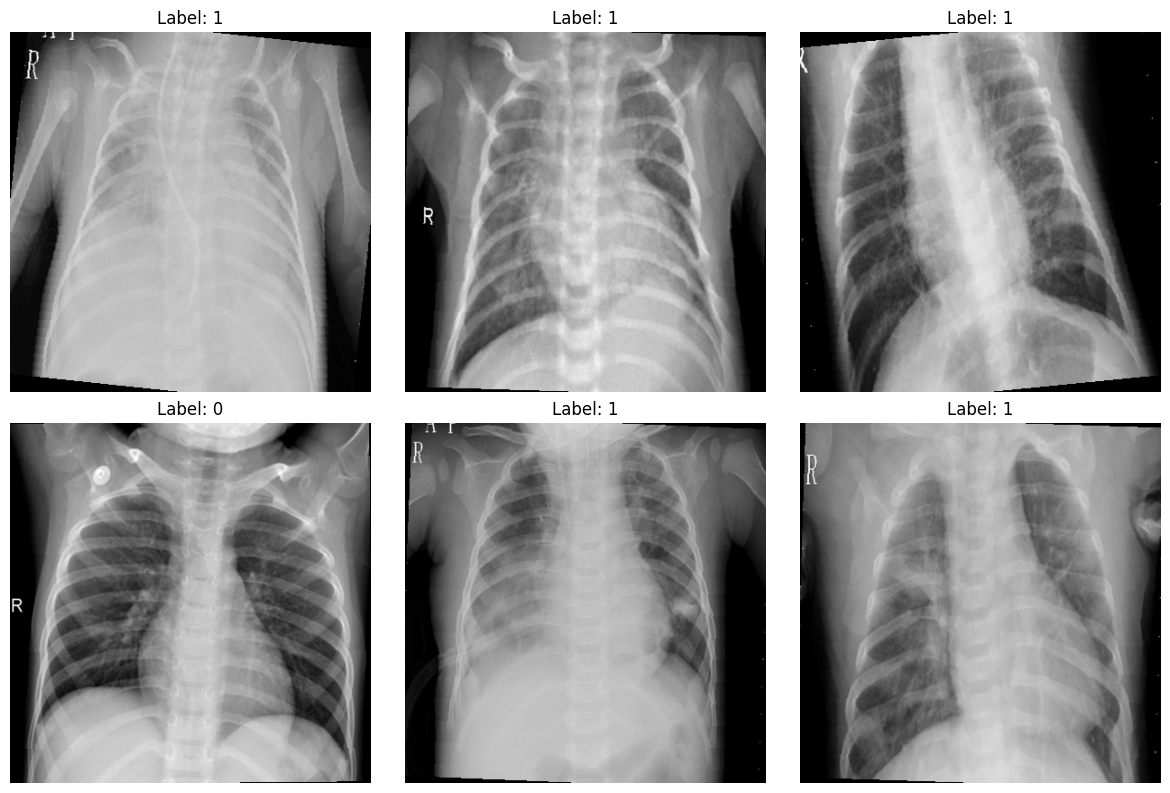

In [34]:
# Function to display an image with proper normalization
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray")
    plt.axis('off')

# Function to display a batch of images in a grid
def show_batch_images(dataloader, num_images=6):
    # Get a batch of images and labels
    dataiter = iter(dataloader)
    images, labels = next(dataiter)

    # Plot the images in a grid
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)  # Create a 2x3 grid
        imshow(images[i])
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to show a batch of images from the training set
show_batch_images(train_loader)


Epoch 1/5, Step 1/80, Loss: 0.7325358390808105
Epoch 1/5, Step 6/80, Loss: 0.9917263388633728
Epoch 1/5, Step 11/80, Loss: 1.1910557746887207
Epoch 1/5, Step 16/80, Loss: 1.8286992311477661
Epoch 1/5, Step 21/80, Loss: 1.0606350898742676
Epoch 1/5, Step 26/80, Loss: 0.42571187019348145
Epoch 1/5, Step 31/80, Loss: 0.3409183919429779
Epoch 1/5, Step 36/80, Loss: 0.3417451083660126
Epoch 1/5, Step 41/80, Loss: 0.84961998462677
Epoch 1/5, Step 46/80, Loss: 0.29758358001708984
Epoch 1/5, Step 51/80, Loss: 1.126650094985962
Epoch 1/5, Step 56/80, Loss: 0.40313270688056946
Epoch 1/5, Step 61/80, Loss: 0.8136196732521057
Epoch 1/5, Step 66/80, Loss: 0.291818231344223
Epoch 1/5, Step 71/80, Loss: 0.36731773614883423
Epoch 1/5, Step 76/80, Loss: 0.30457475781440735
Epoch 1, Train Accuracy: 77.65%
Epoch 1, Learning Rate: 0.00100000
Epoch 1, Validation Accuracy: 69.85%
Epoch 2/5, Step 1/80, Loss: 0.2466506063938141
Epoch 2/5, Step 6/80, Loss: 1.1734319925308228
Epoch 2/5, Step 11/80, Loss: 0.1930

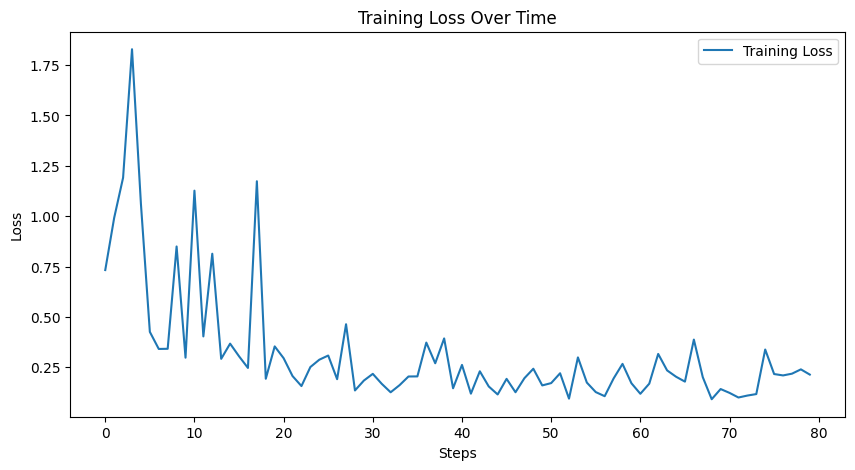

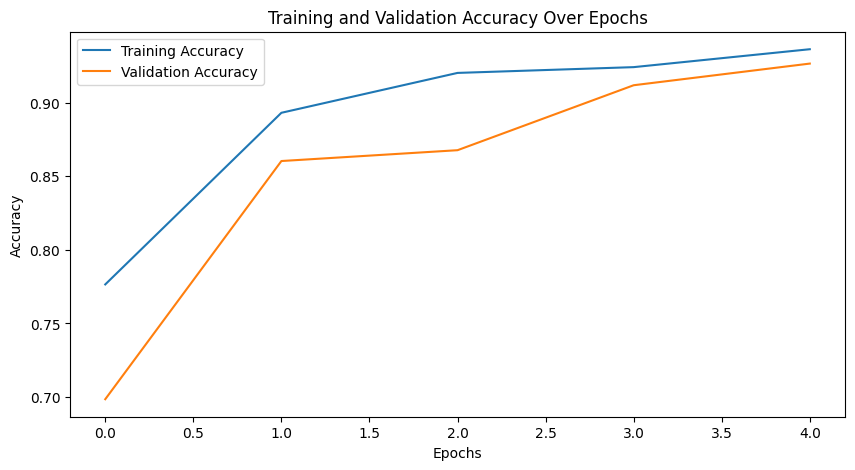

Classification report of the validation: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        68
           1       0.93      0.93      0.93        68

    accuracy                           0.93       136
   macro avg       0.93      0.93      0.93       136
weighted avg       0.93      0.93      0.93       136

Classification report of the Test: 
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       234
           1       0.88      0.94      0.91       390

    accuracy                           0.89       624
   macro avg       0.89      0.87      0.88       624
weighted avg       0.89      0.89      0.89       624



In [33]:
class ResBox(nn.Module):
    def __init__(self, inpute_ch, output_ch,stride=1,downsample=None):
        r"""ResBex is a class of the box that is repeating each time
        it containes :3x3 conv layer
                        inpute channel
                        output channel
                        stride
                        downsample
        """
        super(ResBox,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(inpute_ch,output_ch,kernel_size=(3,3),stride=stride,padding=1),
            nn.BatchNorm2d(output_ch),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(output_ch,output_ch,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(output_ch),
        )
        self.downsample = downsample


    def forward(self,x):
        id = x
        out = self.conv1(x)
        out = self.conv2(out)
        if self.downsample is not None:
            id = self.downsample(x)

        if out.shape != id.shape:
          print(f"Dimension mismatch: out shape: {out.shape}, id shape: {id.shape}")

        out += id
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self,box):
        """"

        """
        super(ResNet,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,64,kernel_size=6,stride=2),
            nn.BatchNorm2d(64),
            nn.AvgPool2d(kernel_size=2),
            )
        # make the layers out of the boxes:
        self.layer2 = self.makelayer(box,3,1,64,64)
        self.layer3 = self.makelayer(box,4,2,64,128)
        self.layer4 = self.makelayer(box,6,2,128,256)
        self.layer5 = self.makelayer(box,3,2,256,512)

        # Avg pool
        self.avgpool = nn.AvgPool2d(kernel_size=7,stride=1)
        # Fully connected layer

        self.fc1 = nn.Sequential(
            nn.Linear(25088, 1000),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.fc2 = nn.Linear(1000,2)

    def makelayer(self, box, n, stride, input_channel, output_channel):
        downsample = None
        a = output_channel/2
        if (stride != 1) or input_channel != output_channel:
          # print(f"downsampling from {input_channel} into {output_channel}")
          downsample = nn.Sequential(
                nn.Conv2d(input_channel,output_channel,kernel_size=1,stride=stride),
                nn.BatchNorm2d(output_channel),
                )
        layers = []
        layers.append(box(input_channel,output_channel,stride=stride,downsample=downsample))
        input_channel = output_channel
        for i in range(n-1):
            layers.append(box(input_channel,output_channel,stride=1))

        return nn.Sequential(*layers)


    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out

# Create the model & hyperparameters
model = ResNet(ResBox).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-5)
loss_func = nn.CrossEntropyLoss()

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Training loop with visualizations
num_epochs = 5
record_steps = 5
train_losses = []
val_accuracies = []
train_accuracies = []



for epoch in range(num_epochs):
    correct_train = 0
    total_train = 0
    for idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predictions = torch.max(outputs, 1)
        correct_train += (predictions == labels).sum().item()
        total_train += labels.size(0)

        if idx % record_steps == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Step {idx+1}/{len(train_loader)}, Loss: {loss.item()}")
            train_losses.append(loss.item())

    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f"Epoch {epoch+1}, Train Accuracy: {train_accuracy * 100:.2f}%")

    # Validation accuracy after each epoch
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_func(outputs, labels)  # Calculate validation loss
            val_loss += loss.item()
            _, predictions = torch.max(outputs, 1)
            correct_val += (predictions == labels).sum().item()
            total_val += labels.size(0)

    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}, Learning Rate: {optimizer.param_groups[0]['lr']:.8f}")

    print(f"Epoch {epoch+1}, Validation Accuracy: {val_accuracy * 100:.2f}%")
    model.train()

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Over Epochs")
plt.legend()
plt.show()

model.eval()
all_preds = []
all_labels = []
test_preds = []
test_labels = []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

classification_report_str = classification_report(all_labels, all_preds, target_names=traindataset.classes)
print("Classification report of the validation: ")
print(classification_report(all_labels,all_preds))


# Evaluate on test dataset
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        test_preds.extend(predictions.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

classification_report_str = classification_report(test_labels, test_preds, target_names=traindataset.classes)
print("Classification report of the Test: ")
print(classification_report(test_labels,test_preds))

0.8878205128205128

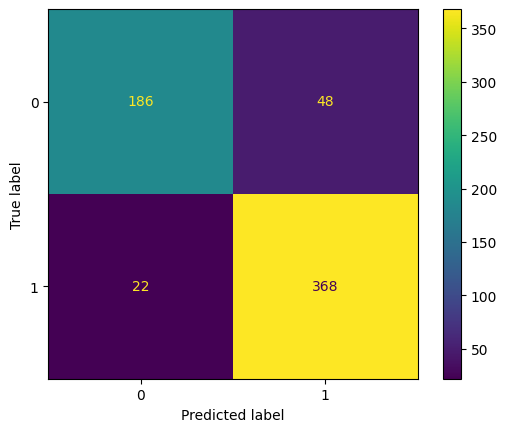

In [43]:
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
accuracy_score(test_labels, test_preds)

In [45]:
torch.save(model.state_dict(), 'ResNet34Model.pth')